<a href="https://colab.research.google.com/github/alejandramcr/CreditScoringPrediction/blob/main/CreditScoringPredictionV2_clase_balanceada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**

### Análisis de Riesgo Crediticio con Modelos de Machine Learning

(con la Clase Balanceada)


---




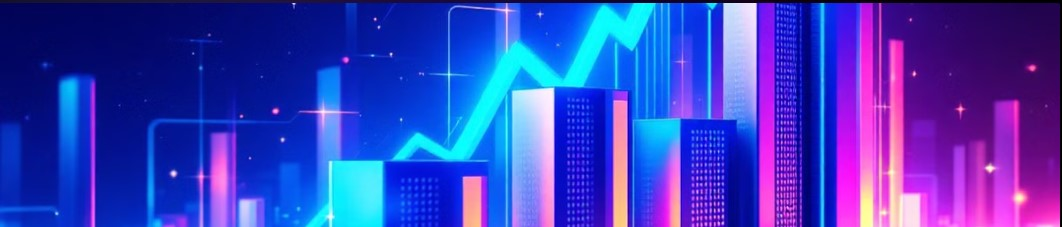

Febrero- marzo 2025

*Grupo #3*

Alejandra Cruz R.

Brusly Patiño S.

Juan García C.


*Bootcamp Xperience*

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

#**1. Preprocesamiento de Datos**


---


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/alejandramcr/CreditScoringPrediction/refs/heads/main/CreditRisk.csv")
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [5]:
#Realizar copia del df original
data = df.copy()

Diccionario de datos:

**Descripción de Variables del Dataset de Credit Scoring**

status: Estado del crédito, indicando la situación actual del mismo.

seniority: Años de experiencia laboral del solicitante.

home: Tipo de vivienda del solicitante.

time: Plazo del préstamo en meses.

age: Edad del solicitante.

marital: Estado civil del solicitante.

records: Historial de créditos previos del solicitante.

job: Tipo de trabajo o categoría ocupacional.

expenses: Gastos mensuales reportados.

income: Ingresos mensuales del solicitante.

assets: Valor de los ahorros o activos.

debt: Obligaciones financieras actuales.

amount: Monto solicitado en el préstamo.

price: Prima o valor total a devolver por el crédito.

## Resumen de los datos


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


**Observación**: La data no presenta valores nulos y los tipos de datos se corresponden con las variables

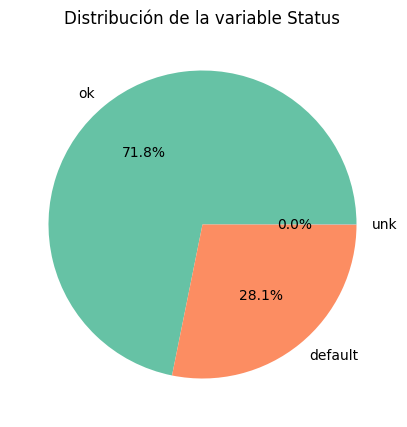

In [8]:
# Grafica circular de los valores de columna status
status_counts = data['status'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',colors=sns.color_palette('Set2'))

plt.title('Distribución de la variable Status')
plt.show()

## 1.1 Formato de la columna Default
Default es nuestra **variable** **objetivo**

In [9]:
#cantidad de valores de cada categoria de la variable status
data['status'].value_counts()

,count
status,
ok,3200
default,1254
unk,1


In [10]:
# Se agrupan en la columna default los valores con default de la columna status y los que no tienen ese valor (ok y unk)
#Crear una nueva columna default:
#si el status es 'default' (1) en los otros casos (0)
data['default'] = data['status'].apply(lambda x: 1 if x == 'default' else 0)

# Contar los valores de la nueva columna
default_counts = data['default'].value_counts().sort_index()

# Renombrar el índice
default_counts.index = default_counts.index.map({0: '0', 1: '1'})

# Renombrar la serie con el nombre 'count'
default_counts.name = 'count'


In [11]:
#Mostrar los valores acumulados de cada categoria de esta nueva columna
data.default.value_counts()

,count
default,
0,3201
1,1254


In [12]:
#verificamos nuevamente el dataframe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
 14  default    4455 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 522.2+ KB


**Observación**: puede observarse la nueva columna **default**

## 1.2 Datos anómalos

Se van a identificar los datos anómalos de la data

In [13]:
t_desc_num = data.describe()
t_desc_num.round(0)

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0,0.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0,0.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0,0.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0,0.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0,0.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0,1.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0,1.0


Observaciones:

**Income** (Ingresos mensuales del solicitante)

Los ingresos medios son de 763,317 , pero la desviación estándar es muy alta (8,703,625), lo que indica una gran variabilidad en los ingresos.

El 25% de los clientes tienen ingresos de 80  o menos, mientras que el 75% tienen 166  o menos.

El valor máximo es de 99999999.0 , lo que sugiere la **presencia de valores atípicos extremadamente alto**s.

**Assets** (Valor de los ahorros o activos)

Los activos medios son de 1,060,341 , con una desviación estándar muy alta (10,217,570), lo que indica también, una gran variabilidad.

El 25% de los clientes no tienen activos, mientras que el 75% tienen 6,000  o menos.

El valor máximo es de 99999999.0 , lo que nuevamente sugiere la **presencia de valores atípicos extremadamente altos**.

**Debt** (Obligaciones financieras actuales)

La deuda media es de 404,382 , con una desviación estándar muy alta (6,344,253), esto indica una gran variabilidad.

El 25% de los clientes no tienen deuda, mientras que el 75% también tienen 0  de deuda.

El valor máximo es de 99999999.0, lo que sugiere la **presencia de valores atípicos extremadamente altos**.

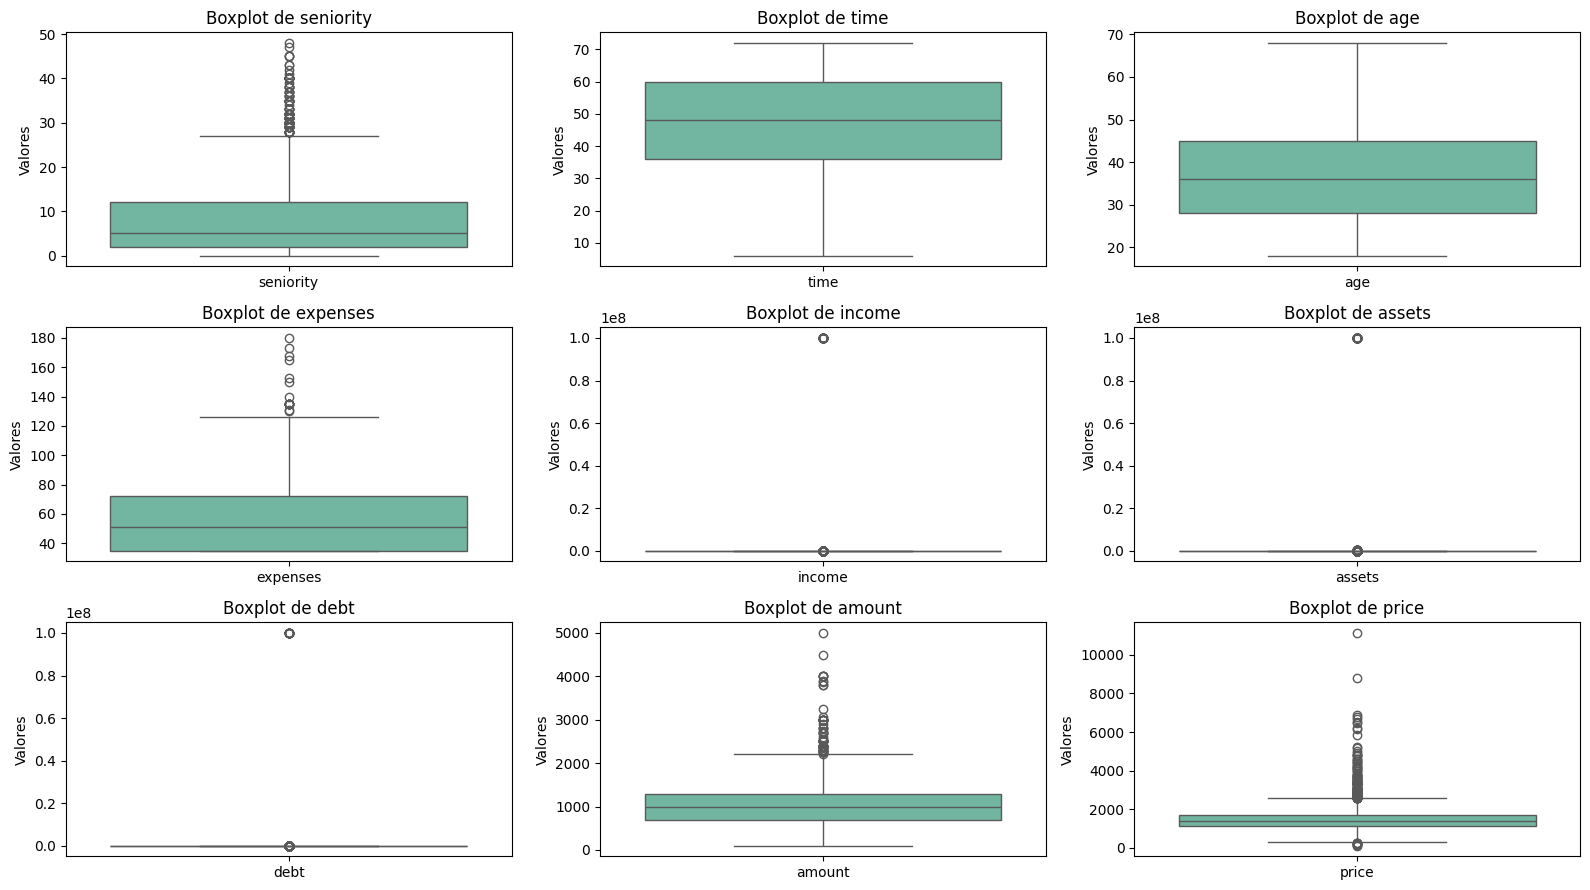

In [14]:
# Veamos los valores atípico con gráficas de boxplot
#box plots para cada una de las 9 variables de tipo numéricas
numeric_features = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']
# Configurar la paleta de colores
sns.set_palette('Set2')

plt.figure(figsize=(16, 9))

# Iterar sobre las características y crear los box plots
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data[[feature]])  # Uso seaborn para crear el box plot
    plt.title(f'Boxplot de {feature}')
    plt.ylabel('Valores')

# Ajuste del layout
plt.tight_layout()
plt.show()


**Observaciones**: Se tienen valores atípicos fuera del rango de los normal en las variables **income, assets y debt**

Se remplazan los 999999 con valores nulos

In [15]:
# Reemplazar los valores 99999999 con NaN
data = data.replace(99999999, np.nan)

# Mostrar el DataFrame actualizado
data.describe().round(0)

,seniority,time,age,expenses,income,assets,debt,amount,price,default
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0,0.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0,0.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0,0.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0,0.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0,0.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0,1.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0,1.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4455 non-null   object 
 1   seniority  4455 non-null   int64  
 2   home       4455 non-null   object 
 3   time       4455 non-null   int64  
 4   age        4455 non-null   int64  
 5   marital    4455 non-null   object 
 6   records    4455 non-null   object 
 7   job        4455 non-null   object 
 8   expenses   4455 non-null   int64  
 9   income     4421 non-null   float64
 10  assets     4408 non-null   float64
 11  debt       4437 non-null   float64
 12  amount     4455 non-null   int64  
 13  price      4455 non-null   int64  
 14  default    4455 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 522.2+ KB


Se observan las variables income, assets y debt con valores nulos

## 1.3 Imputando Datos

In [17]:
#Contamos los valores nulos de cada variable
data.isnull().sum()

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,34


In [18]:
# Imputamos los valores faltantes en las columnas 'income', 'assets' y 'debt' con la mediana de cada columna
data[['income', 'assets', 'debt']] = data[['income', 'assets', 'debt']].fillna(data[['income', 'assets', 'debt']].median())

In [19]:
data.isnull().sum() #verificamos el resultado

,0
status,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,0


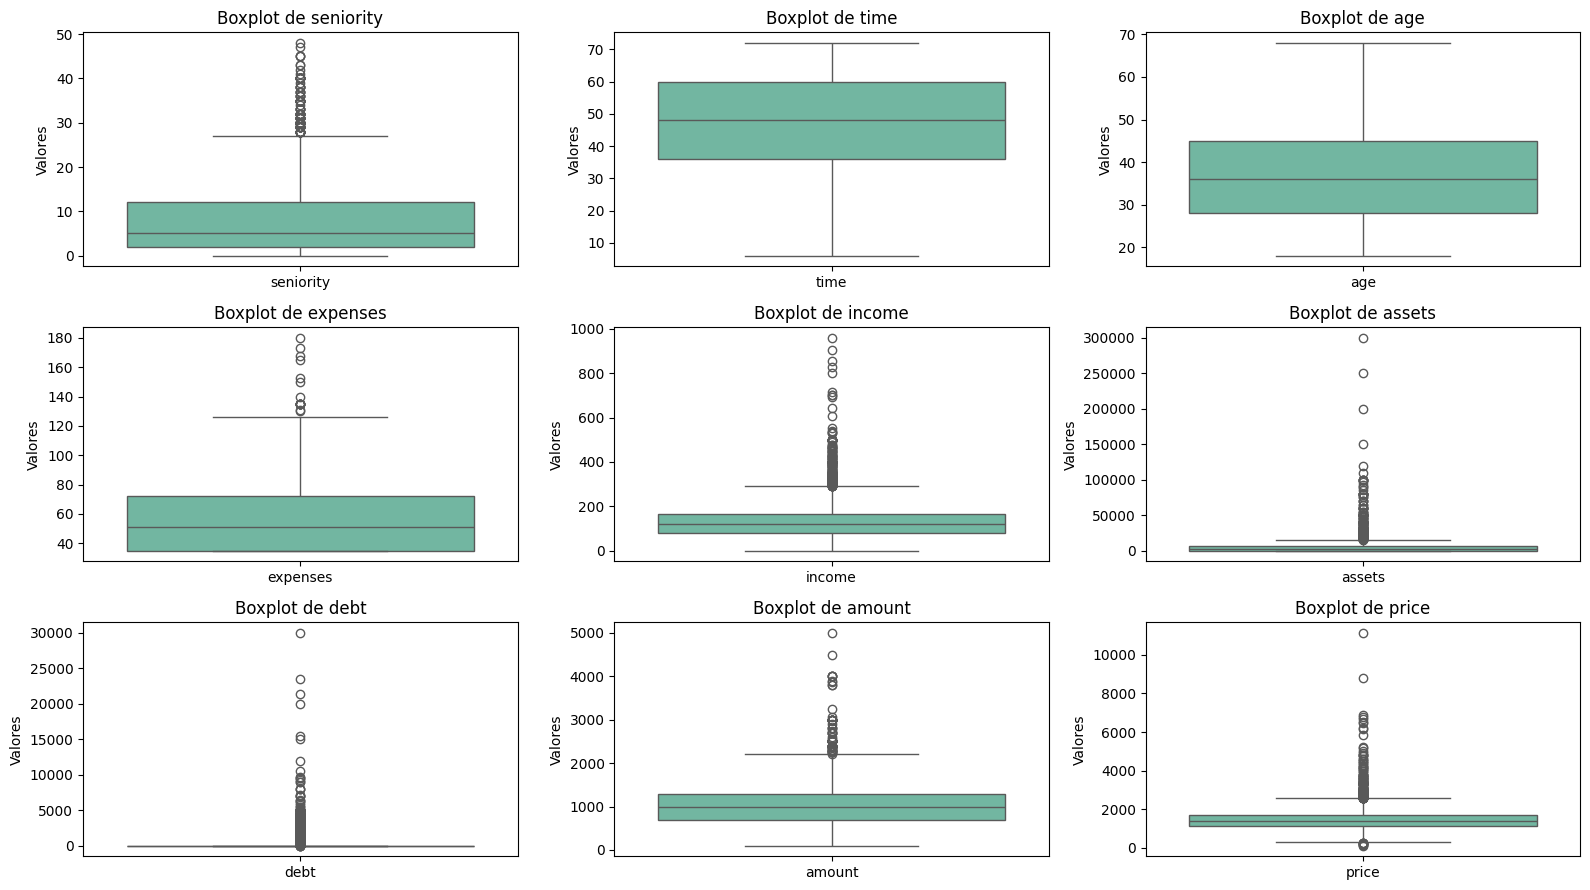

In [20]:
# Graficamos nuevamente las variables numéricas
#box plots para cada una de las 9 variables de tipo numéricas luego de eliminar los valores extremos
numeric_features = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']
# Configurar la paleta de colores
sns.set_palette('Set2')

plt.figure(figsize=(16, 9))

# Iterar sobre las características y crear los box plots
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data[[feature]])
    plt.title(f'Boxplot de {feature}')
    plt.ylabel('Valores')

# Ajuste del layout
plt.tight_layout()
plt.show()

##1.4 Descriptivos Numéricos

Histograma de variables: creamos un histograma para observar la distribucion de cada variable

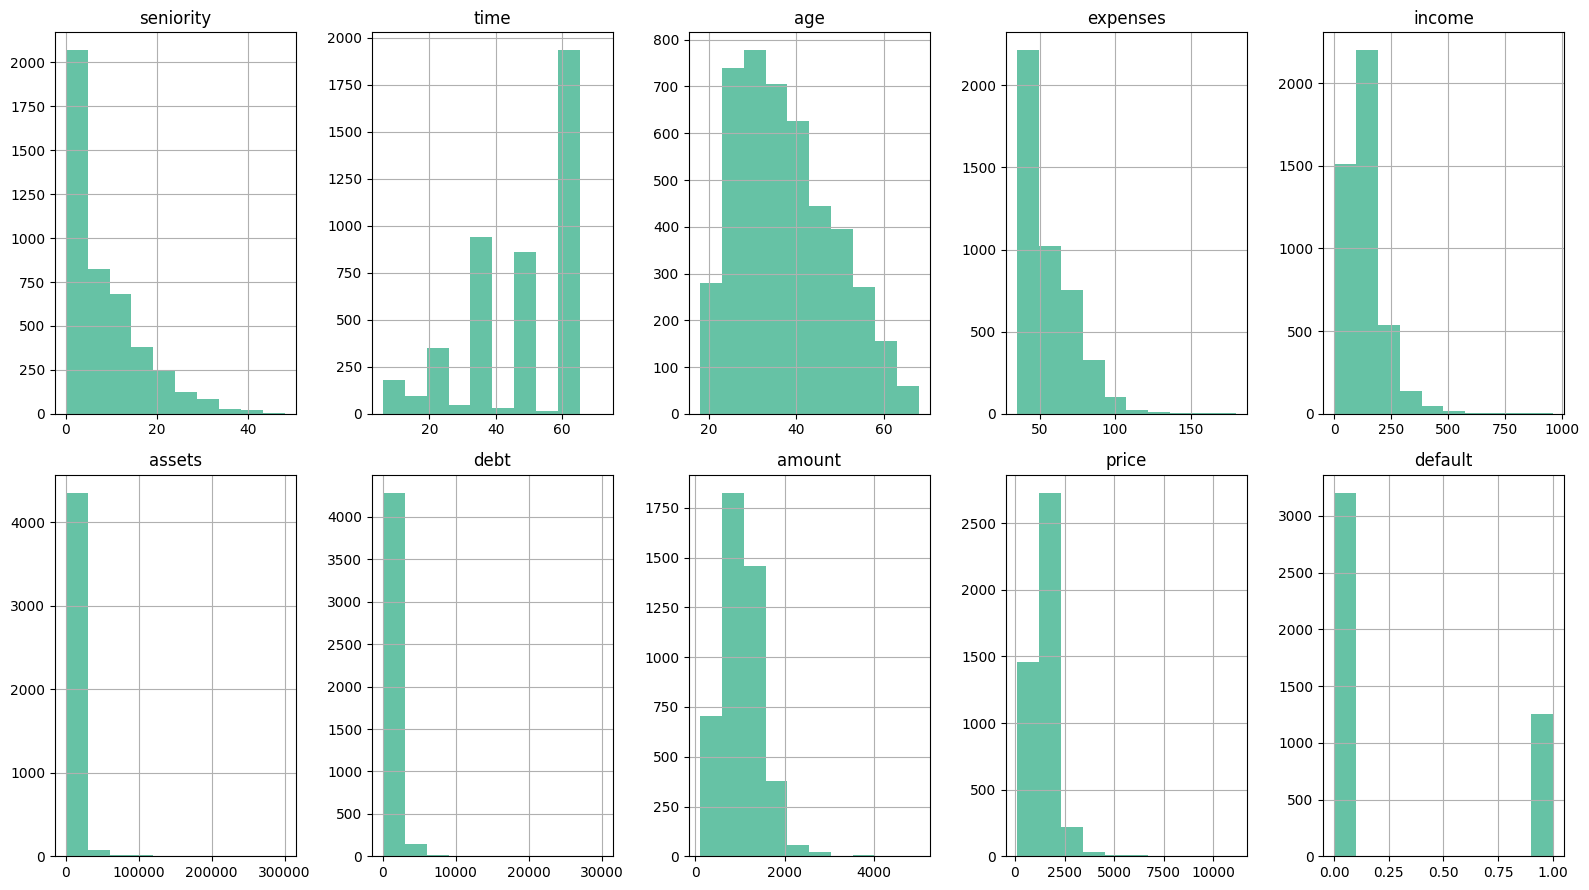

In [21]:
# Para estas graficas solo tomamos en cuenta las columnas/variables numéricas
num_cols = data.select_dtypes(include=['float', 'int64']).columns

# Configurar la paleta de colores
sns.set_palette('Set2')

fig, axes = plt.subplots(2, 5, figsize=(16, 9))  # 2 filas y 5 columnas
axes = axes.flatten()

# Iterar sobre cada columna numérica y crear un histograma
for i, col in enumerate(num_cols):
    data[col].hist(ax=axes[i], bins=10)
    axes[i].set_title(col)

# Ocultar los ejes vacíos si hay menos columnas que subgráficos
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

En esta gráficas observamos el comportamiento de los datos. Por ejemplo se observa que la mayoría de los clientes tiene un seniority de 9 años o menos. La edad de la mayoría de los clientes está entre los 30 y 40 años

In [22]:
data.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price',
       'default'],
      dtype='object')

## 1.5 Truncando valores atípicos

In [23]:
# Diccionario con las variables y sus límites de percentil
trunc = {'expenses': 0.99, 'income': 0.99, 'assets': 0.99, 'debt': 0.99, 'amount': 0.99, 'price': 0.99}

# Iterar sobre cada variable y su límite
for var, lim in trunc.items():
    # Calcular el percentil correspondiente
    percentile_limit = np.percentile(data[var], lim * 100)

    # Truncar los valores atípicos
    data[var] = np.where(data[var] > percentile_limit, percentile_limit, data[var])

    print(f"Se trunca {var} en {percentile_limit:.2f}")

Se trunca expenses en 106.46
Se trunca income en 428.92
Se trunca assets en 50000.00
Se trunca debt en 4773.00
Se trunca amount en 2500.00
Se trunca price en 3559.46


## 1.6 Descriptivos Cualitativos

Observemos ahora las variables cualitativas

In [24]:
cuali = data.select_dtypes('object')
cuali.describe()

,status,home,marital,records,job
count,4455,4455,4455,4455,4455
unique,3,7,6,2,5
top,ok,owner,married,no,fixed
freq,3200,2107,3241,3682,2806


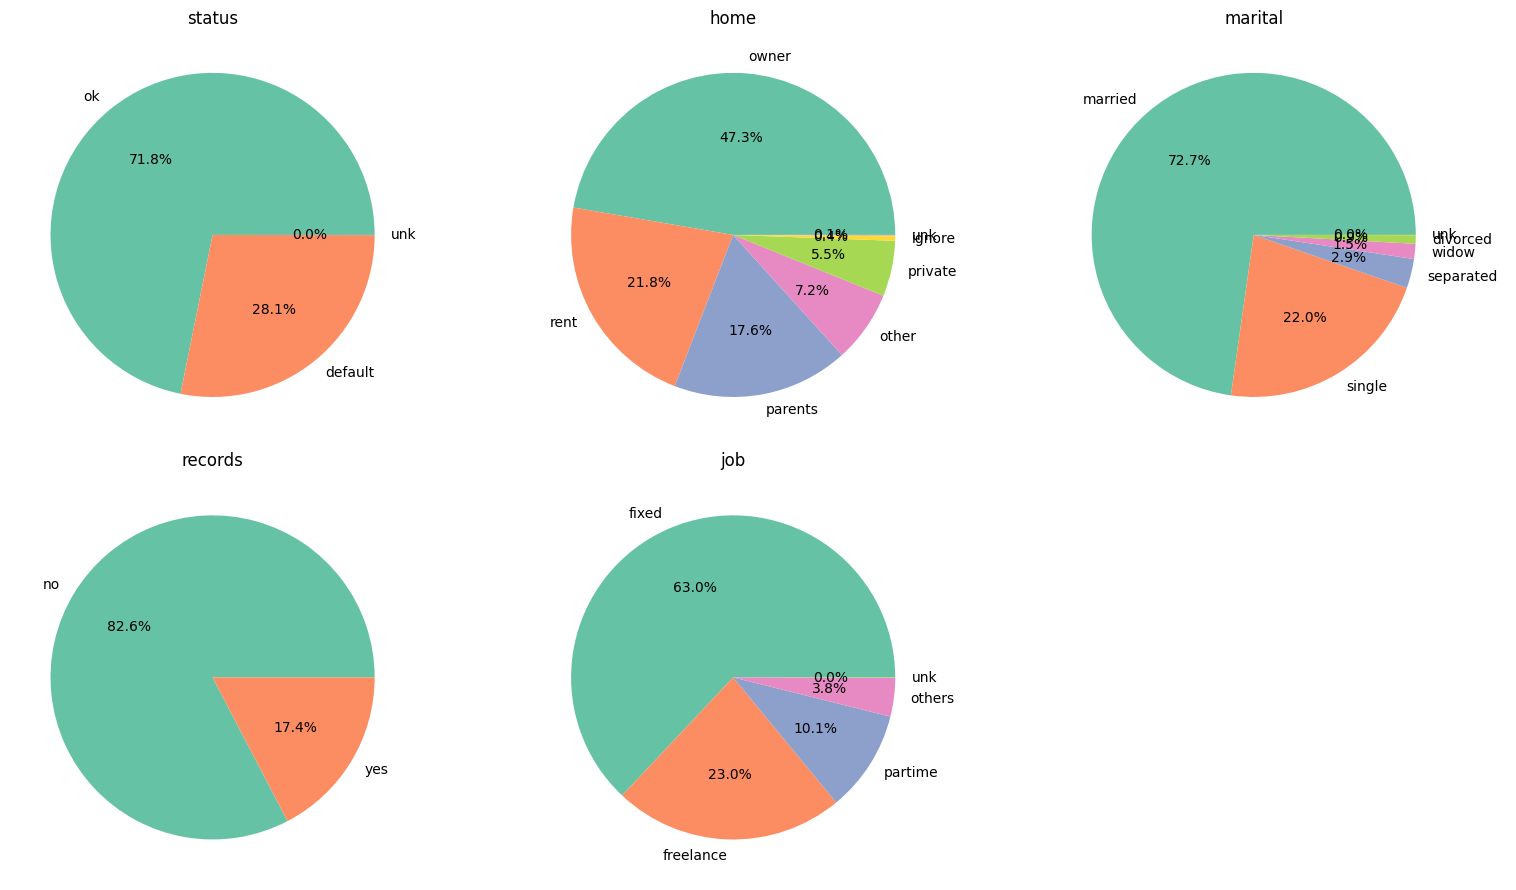

In [25]:
#Gráfico circular para variables cualitativas:
cualis = cuali.columns
fig, ax = plt.subplots(2, 3, figsize=(16, 9))
i = 0

# Configurar la paleta de colores
sns.set_palette('Set2')

# Iterar sobre las filas y columnas de la cuadrícula
for row in range(2):
    for col in range(3):
        if i < len(cualis):
            columna_actual = cualis[i]
            frecuencias = cuali[columna_actual].value_counts()

            # Crear el gráfico circular en la posición correspondiente
            ax[row, col].pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%')
            ax[row, col].set_title(columna_actual)

            i += 1
        else:
            # Si no hay más columnas, ocultar el subplot vacío
            ax[row, col].axis('off')

plt.tight_layout()
plt.show()

Vamos a reagrupar las categorías con valores bajos de las columnas home y marital:

## 1.7 Reagrupando categorias

In [26]:
#frecuencia de cada categoría de la variable home
data.home.value_counts()

,count
home,
owner,2107
rent,973
parents,783
other,319
private,247
ignore,20
unk,6


**Las categorias poco representativas de la variable home: son ignore y unk**

In [27]:
low_freq = pd.Index(data.loc[data['home'].isin(['ignore', 'unk']), 'home'].drop_duplicates(), name='home')

# Mostrar el resultado
print(low_freq)

Index(['ignore', 'unk'], dtype='object', name='home')


In [28]:
# Reemplazar 'ignore' y 'unk' por 'other' con  apply y lambda
data['home'] = data['home'].apply(lambda x: 'other' if x in ['ignore', 'unk'] else x)

# Mostrar el DataFrame resultante
data

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,ok,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,ok,17,rent,60,58,widow,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,default,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,ok,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,ok,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69.0,92.0,0.0,0.0,900.0,1020.0,1
4451,ok,22,owner,60,46,married,no,fixed,60.0,75.0,3000.0,600.0,950.0,1263.0,0
4452,default,0,owner,24,37,married,no,partime,60.0,90.0,3500.0,0.0,500.0,963.0,1
4453,ok,0,rent,48,23,single,no,freelance,49.0,140.0,0.0,0.0,550.0,550.0,0


In [29]:
#frecuencia actualizada de cada categoría de la variable home
data['home'].value_counts()

,count
home,
owner,2107
rent,973
parents,783
other,345
private,247


In [30]:
#frecuencia de cada categoría de la variable marital
data.marital.value_counts()


,count
marital,
married,3241
single,978
separated,130
widow,67
divorced,38
unk,1


**Las categorias poco representativas de la variable marital son:['separated', 'widow', 'divorced', 'unk']**

In [31]:
low_freq1 = pd.Index(data.loc[data['marital'].isin(['separated', 'widow', 'divorced', 'unk']), 'marital'].drop_duplicates(), name='marital')

# Mostrar el resultado
print(low_freq1)

Index(['widow', 'separated', 'divorced', 'unk'], dtype='object', name='marital')


In [32]:
# Reemplazar ['separated', 'widow', 'divorced', 'unk'] por 'other' usando apply y lambda
data['marital'] = data['marital'].apply(lambda x: 'other' if x in ['separated', 'widow', 'divorced','unk'] else x)

# Mostrar el DataFrame resultante
data

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,ok,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,ok,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,default,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,ok,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,ok,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69.0,92.0,0.0,0.0,900.0,1020.0,1
4451,ok,22,owner,60,46,married,no,fixed,60.0,75.0,3000.0,600.0,950.0,1263.0,0
4452,default,0,owner,24,37,married,no,partime,60.0,90.0,3500.0,0.0,500.0,963.0,1
4453,ok,0,rent,48,23,single,no,freelance,49.0,140.0,0.0,0.0,550.0,550.0,0


In [33]:
#frecuencia de cada categoría de la variable marital
data['marital'].value_counts()

,count
marital,
married,3241
single,978
other,236


## 1.8 Eliminando columnas

In [34]:
# Se elimina la columna status, sus valores ya se tienen en la columna default
data.drop(columns=['status'],inplace=True)

In [35]:
data.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0


#**2. Exploración de Datos**


---


## 2.1 Datos Numéricos

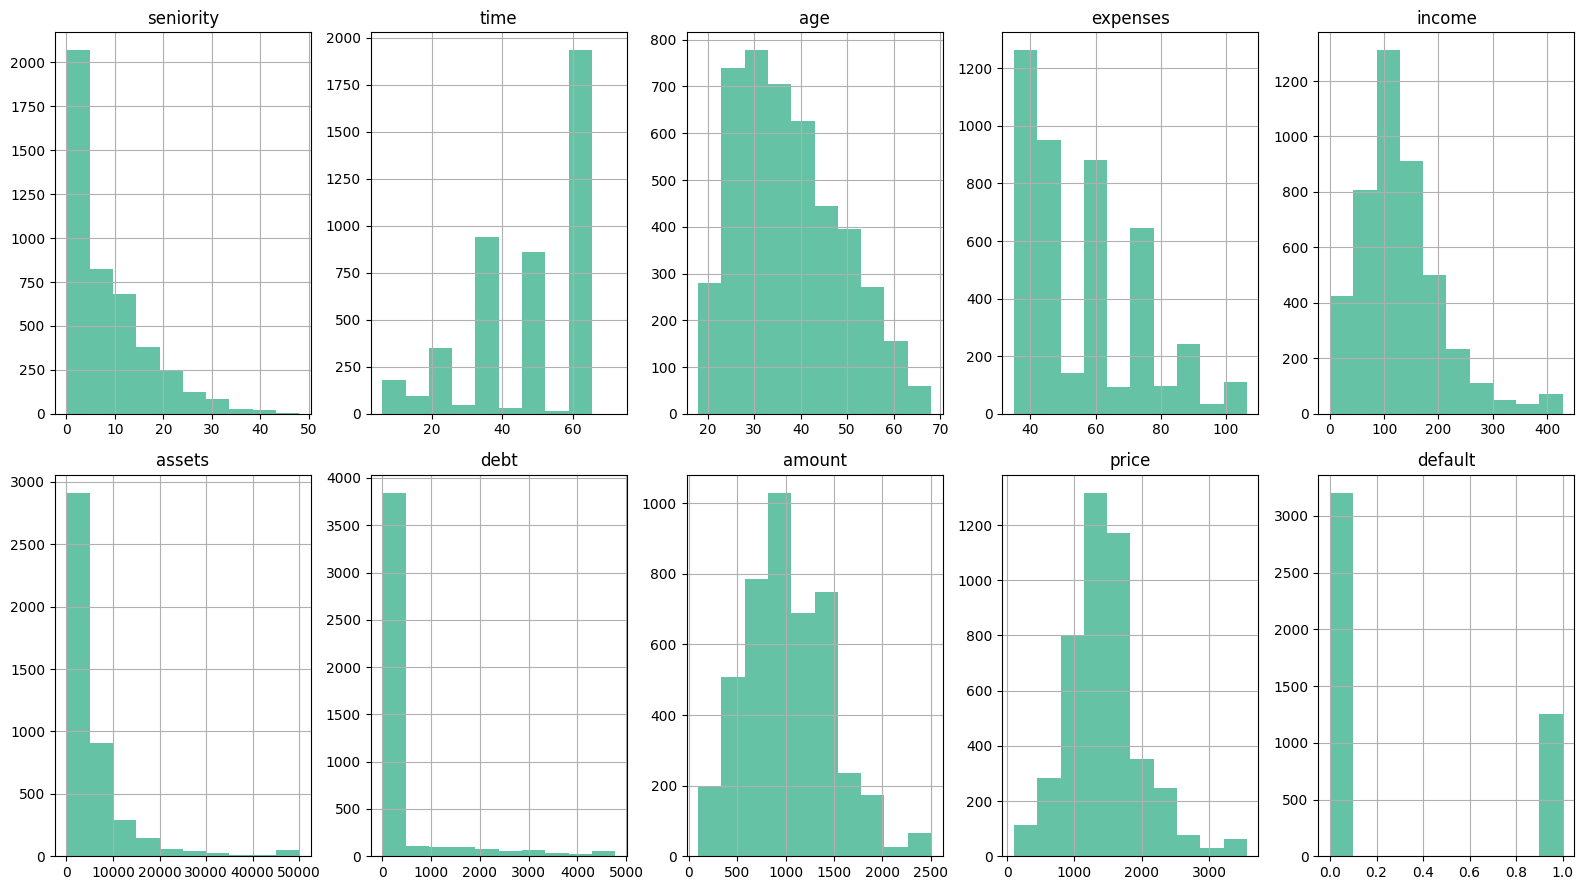

In [36]:
# Graficando nuevamente las variables numéricas sin la columna status
num_cols = data.select_dtypes(include=['float', 'int64']).columns

# Configurar la paleta de colores
sns.set_palette('Set2')

fig, axes = plt.subplots(2, 5, figsize=(16, 9))  # 2 filas y 5 columnas
axes = axes.flatten()

# Iterar sobre cada columna numérica y crear un histograma
for i, col in enumerate(num_cols):
    data[col].hist(ax=axes[i], bins=10)
    axes[i].set_title(col)

# Ocultar los ejes vacíos si hay menos columnas que subgráficos
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

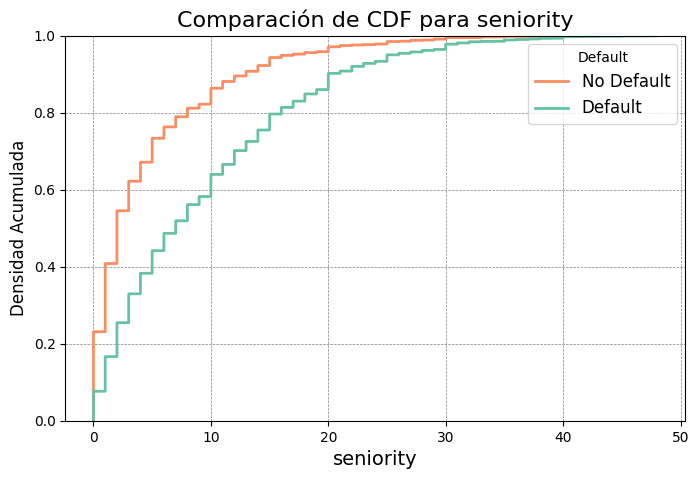

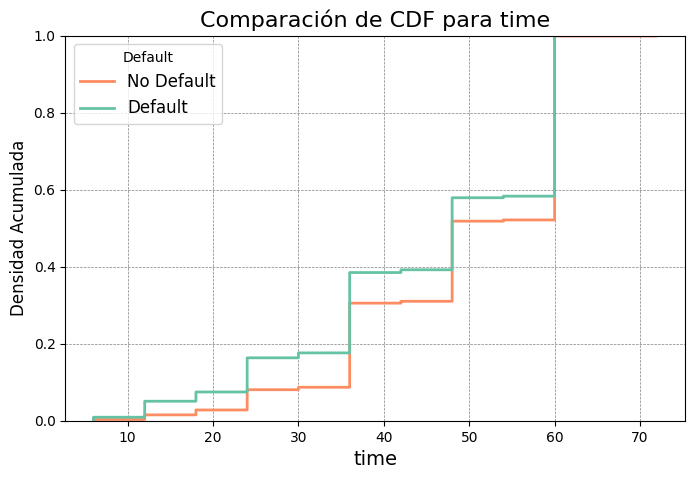

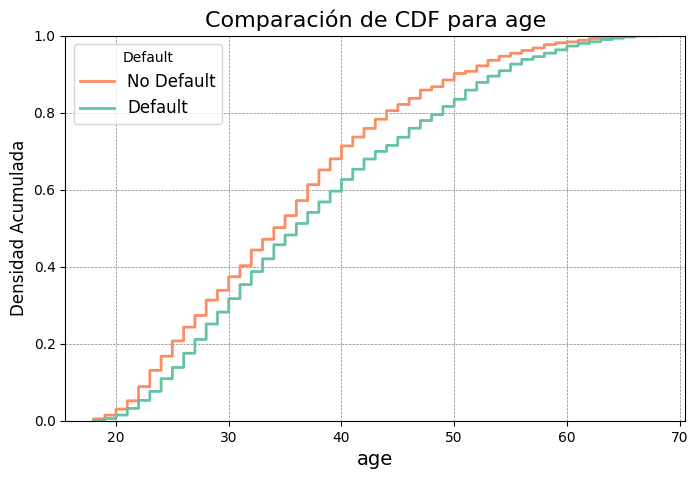

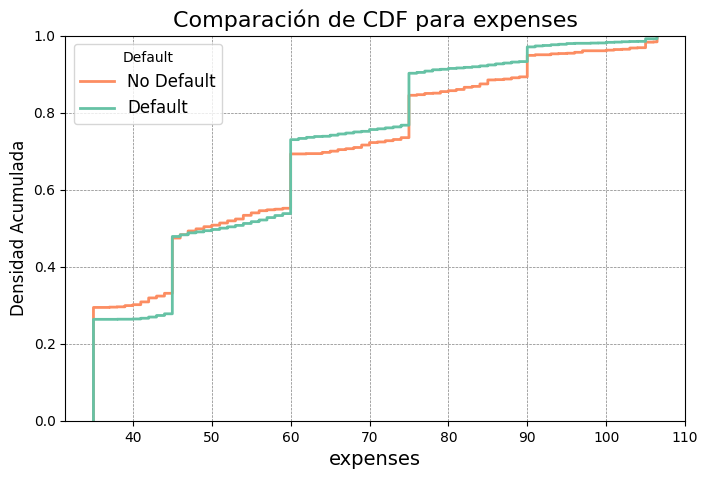

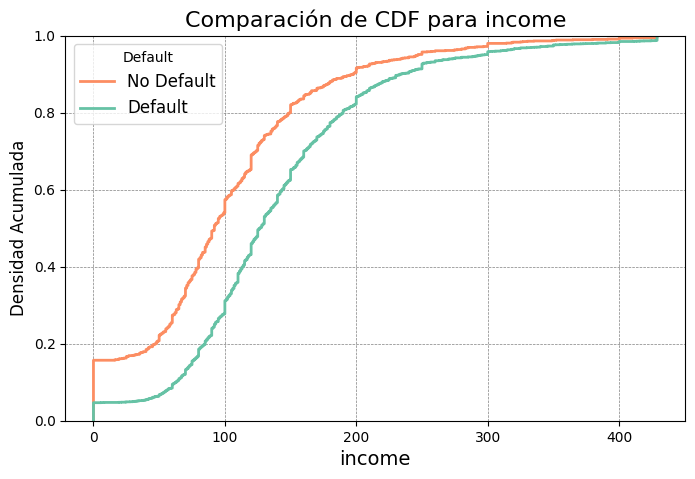

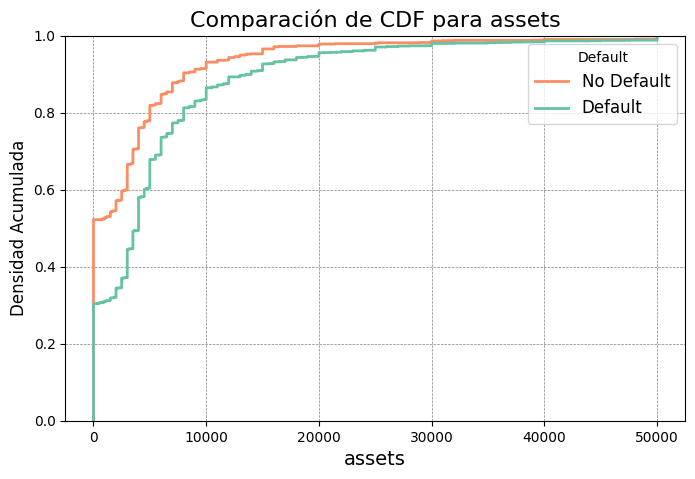

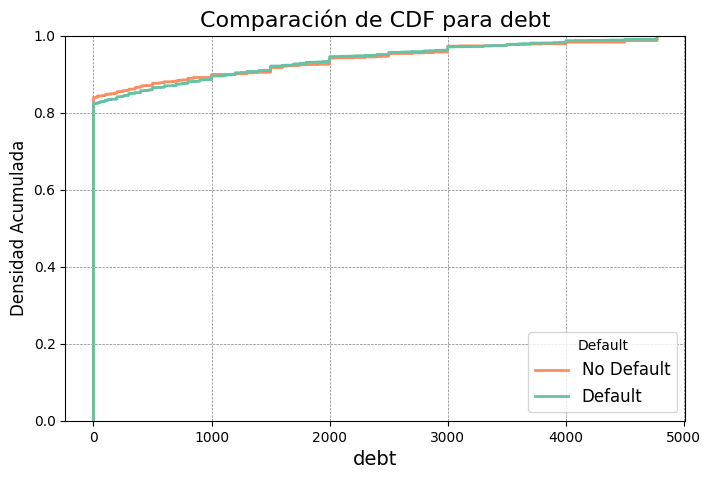

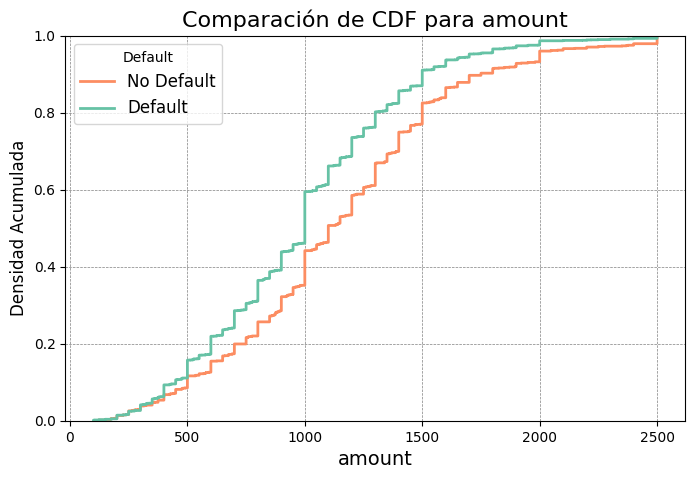

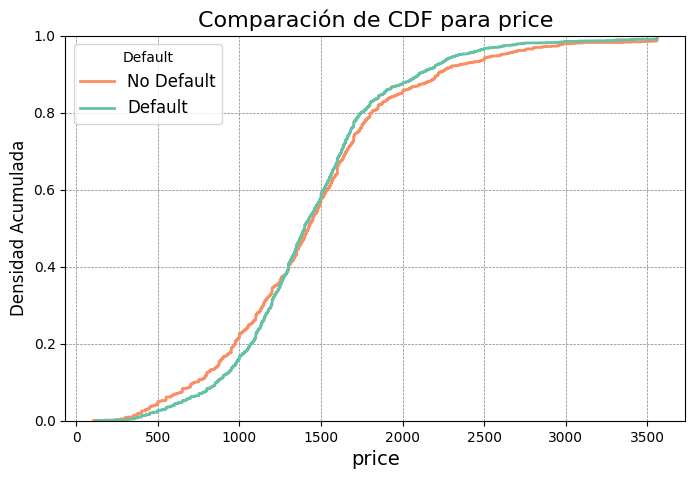

In [37]:
#gráficos de distribución acumulada (CDF) para cada columna numérica
numerics = data.select_dtypes(include=['float64', 'int64']).columns

# ciclo for sobre cada columna numérica (excepto 'default')
for col in numerics.drop('default'):
    plt.figure(figsize=(8, 5))

    # Usar ecdfplot para trazar la CDF segmentada por 'default'
    sns.ecdfplot(data=data, x=col, hue='default', palette='Set2', linewidth=2)

    # Agregar líneas de división en los ejes X e Y
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

    plt.title(f'Comparación de CDF para {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Densidad Acumulada', fontsize=12)
    plt.legend(title='Default',labels=['No Default','Default'], fontsize=12)

    plt.show()

 Los gráficos de distribución acumulada (CDF) para cada columna numérica, comparan cómo se distribuyen los valores entre las categorías de default (por ejemplo, si un cliente incumplió o no un pago). Esto es útil para identificar diferencias en las distribuciones de las variables numéricas entre estos dos grupos

Para la variable **seniority** se tiene que el 80 % de los clientes buenos tienen aproximadamente 8 años de senioriyu. Y el 80 % de los clientes malos, tienen un seniority de 15 años.

Para la variable **edad**, se tiene que el 80 % de los clientes buenos tiene una edad aproximada de 43 años. Y el 80% de los clientes malos tienen una edad de 49 años

## 2.2 Datos Cualitativos

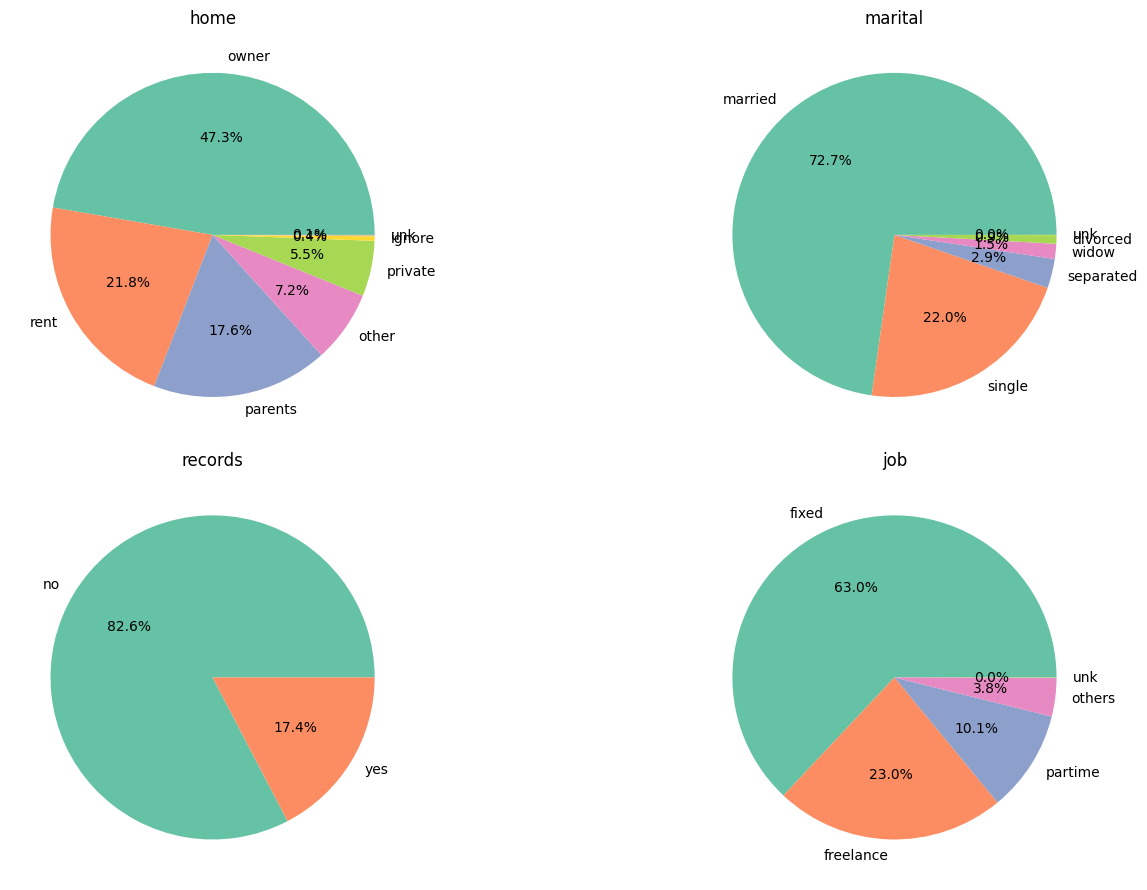

In [38]:
#Grafica de los datos cualitativos
cualis = data.select_dtypes('object').columns
# Configurar la paleta de colores
sns.set_palette('Set2')

fig, ax = plt.subplots(2,2,figsize=(16,9))
i = 0
# Iterar sobre las filas y columnas de la cuadrícula
for row in range(2):
    for col in range(2):
        if i < len(cualis):
            columna_actual = cualis[i]
            frecuencias = cuali[columna_actual].value_counts()

            # Crear el gráfico circular en la posición correspondiente
            ax[row, col].pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%')
            ax[row, col].set_title(columna_actual)

            i += 1
        else:
            # Si no hay más columnas, ocultar el subplot vacío
            ax[row, col].axis('off')

plt.tight_layout()
plt.show()

## 2.3 Contribucion al riesgo

Se realiza unnálisis de riesgo para las columnas categóricas comparando la probabilidad de incumplimiento (default) entre las diferentes categorías de cada columna

             Risk  Risk Ratio
home                         
other    0.460870    1.637300
owner    0.185097    0.657582
parents  0.297573    1.057169
private  0.340081    1.208182
rent     0.398767    1.416671


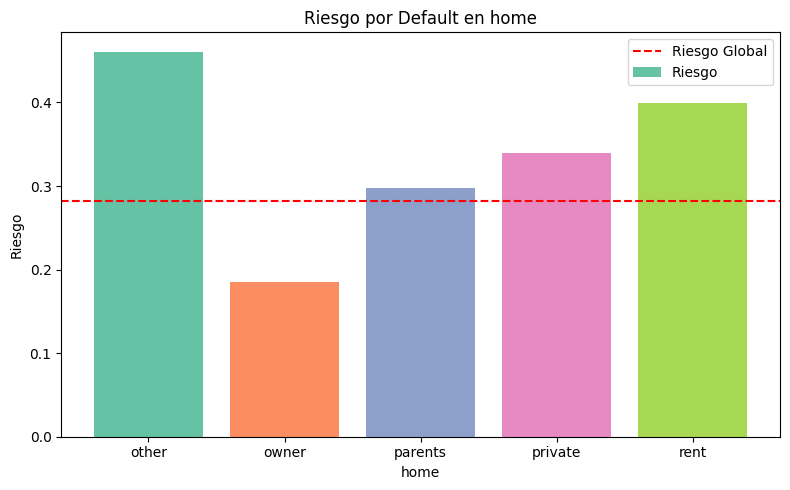

             Risk  Risk Ratio
marital                      
married  0.255785    0.908711
other    0.411017    1.460192
single   0.335378    1.191476


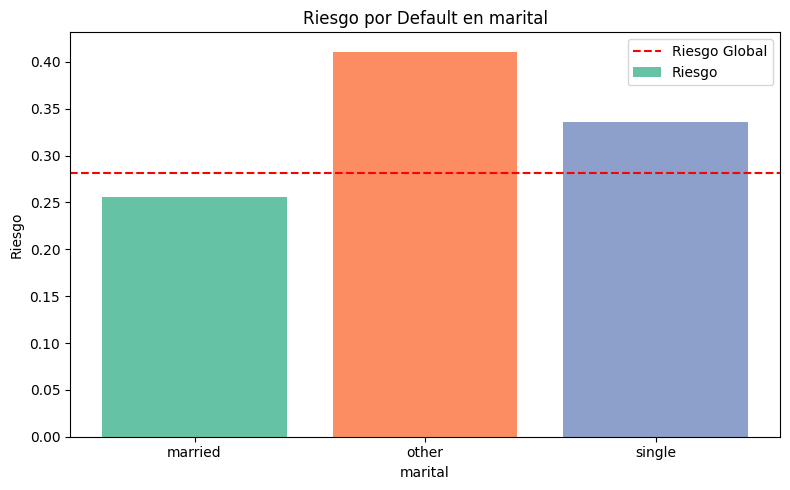

             Risk  Risk Ratio
records                      
no       0.224063    0.796013
yes      0.554981    1.971642


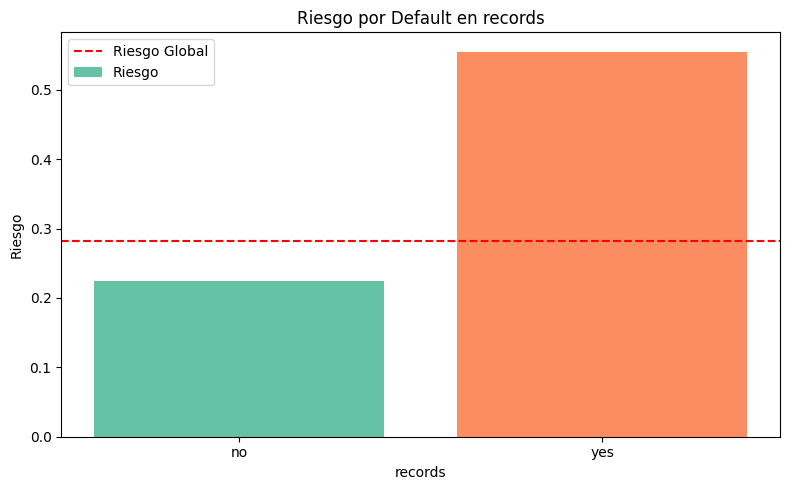

               Risk  Risk Ratio
job                            
fixed      0.206700    0.734329
freelance  0.325195    1.155299
others     0.397661    1.412742
partime    0.599558    2.130007
unk        1.000000    3.552632


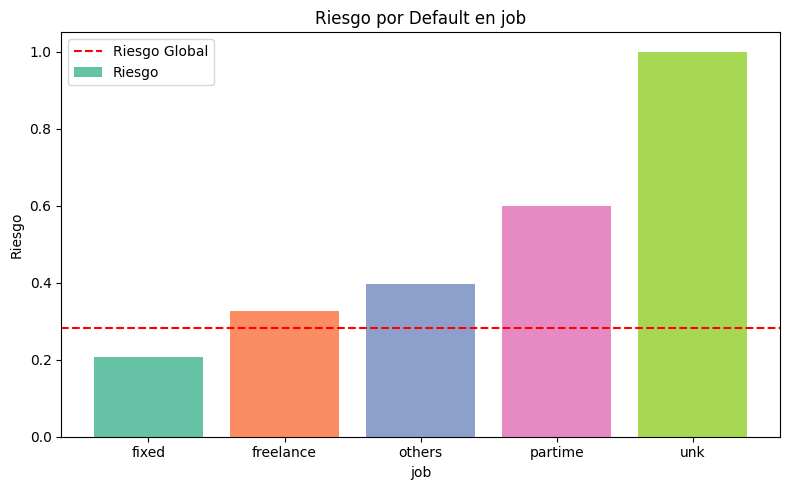

In [39]:
# Selecciona columnas de tipo categórico
cualis = data.select_dtypes(include=['object']).columns

# Función para calcular el riesgo
def risk_analysis(column):
    global_risk = data['default'].mean()
    grouped = data.groupby(column)['default'].mean()
    risk_ratio = grouped / global_risk
    return pd.DataFrame({'Risk': grouped, 'Risk Ratio': risk_ratio})

# Función para graficar el riesgo
def plot_risk(column):
    df_risk = risk_analysis(column)
    plt.figure(figsize=(8, 5))

    # Obtener la paleta de colores de Seaborn
    colors = sns.color_palette('Set2', len(df_risk))

    # Crear el gráfico de barras con colores específicos para cada barra
    plt.bar(df_risk.index, df_risk['Risk'], color=colors, label='Riesgo')

    # Línea horizontal para el riesgo global
    plt.axhline(y=data['default'].mean(), color='r', linestyle='--', label='Riesgo Global')

    plt.title(f'Riesgo por Default en {column}')
    plt.xlabel(column)
    plt.ylabel('Riesgo')
    plt.legend()
    plt.xticks(rotation=0)
    plt.tight_layout()  # Ajustar el layout para evitar que las etiquetas se corten
    plt.show()

# Se aplica la función de análisis y gráfica para cada columna
for col in cualis:
    print(risk_analysis(col))
    plot_risk(col)

Observaciones:
1. En la categoría home, el mayor riesgo lo tienen la personas con valores other, private y rent
2. En la categoría  marital, el mayor riesgo está en los que tienen como valor other y single
3. En la categoría records, tienen un mayor riesgo los que tienen valor yes
4. En la categoría job, tienen un mayor riesgo los que tienen unk, part time y other job

# **3. Construcción de Modelos**


---

## 3.1 Partición de datos

In [40]:
data.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73.0,129.0,0.0,0.0,800.0,846.0,0
1,17,rent,60,58,other,no,fixed,48.0,131.0,0.0,0.0,1000.0,1658.0,0
2,10,owner,36,46,married,yes,freelance,90.0,200.0,3000.0,0.0,2000.0,2985.0,1
3,0,rent,60,24,single,no,fixed,63.0,182.0,2500.0,0.0,900.0,1325.0,0
4,0,rent,36,26,single,no,fixed,46.0,107.0,0.0,0.0,310.0,910.0,0


In [41]:
x = data.drop(columns='default')
x = pd.get_dummies(x)
y = data['default']

In [42]:
# Seleccionar las columnas de tipo booleano
boolean_columns = x.select_dtypes(include='bool').columns

# Convertir las columnas booleanas a enteros
x[boolean_columns] = x[boolean_columns].astype(int)

In [43]:
x.head()

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,...,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
0,9,60,30,73.0,129.0,0.0,0.0,800.0,846.0,0,...,1,0,0,1,0,0,1,0,0,0
1,17,60,58,48.0,131.0,0.0,0.0,1000.0,1658.0,0,...,0,1,0,1,0,1,0,0,0,0
2,10,36,46,90.0,200.0,3000.0,0.0,2000.0,2985.0,0,...,1,0,0,0,1,0,1,0,0,0
3,0,60,24,63.0,182.0,2500.0,0.0,900.0,1325.0,0,...,0,0,1,1,0,1,0,0,0,0
4,0,36,26,46.0,107.0,0.0,0.0,310.0,910.0,0,...,0,0,1,1,0,1,0,0,0,0


In [44]:
boolean_columns

Index(['home_other', 'home_owner', 'home_parents', 'home_private', 'home_rent',
       'marital_married', 'marital_other', 'marital_single', 'records_no',
       'records_yes', 'job_fixed', 'job_freelance', 'job_others',
       'job_partime', 'job_unk'],
      dtype='object')

In [45]:
#Separacion de los datos para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (3118, 24)
Dimensiones de X_test: (1337, 24)
Dimensiones de y_train: (3118,)
Dimensiones de y_test: (1337,)


## **Balancear la data**

Aplicamos la técnica de **sobremuestreo** en nuestros datos para balancear la columna **default**:

In [46]:
# 'default' esta desbalanceado, usaremos SMOTE

from imblearn.over_sampling import SMOTE  # Importar SMOTE
sm = SMOTE(random_state=123)

# Aplicar SMOTE solo al conjunto de entrenamiento
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# Verificar la distribución de la clase 'default' después del balanceo
print("\nDistribución de 'default' después del balanceo (conjunto de entrenamiento):")
print(pd.Series(y_train_balanced).value_counts())

# Unir de nuevo (opcional, si deseas guardar el conjunto balanceado en un DataFrame)
data_balanced = pd.DataFrame(X_train_balanced, columns=x.columns)
data_balanced['default'] = y_train_balanced

# Verificar la distribución de 'default' en el DataFrame balanceado
print("\nDistribución de 'default' en el DataFrame balanceado:")
print(data_balanced['default'].value_counts())


Distribución de 'default' después del balanceo (conjunto de entrenamiento):
default
0    2256
1    2256
Name: count, dtype: int64

Distribución de 'default' en el DataFrame balanceado:
default
0    2256
1    2256
Name: count, dtype: int64


## 3.2 Modelos de clasificación

### Modelo logit

#### Ajustar modelo

In [47]:
reg_logit = LogisticRegression()  # Configura el modelo
reg_logit.fit(X_train_balanced, y_train_balanced)
# Mostrar el modelo ajustado
reg_logit

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Prediccion inicial

In [48]:
clas_logit = reg_logit.predict(X_test)  # Predecir sobre el conjunto de prueba

In [61]:
pd.crosstab(y_test, clas_logit,margins=True)

col_0,0,1,All
default,,,
0,660,285,945
1,115,277,392
All,775,562,1337


Se observa un ligero sesgo, debido a que el modelo en su predicción va a considerar que el 70.6% son buenos clientes, esto es 945/1337 = 0.706

El modelo considera que solo el 29% de los clientes son morosos (392/1337)


El modelo considera 775 clientes buenos y 562 clientes malos. Lo cual mejora la predicción

In [49]:
print(classification_report(y_test, clas_logit))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       945
           1       0.49      0.71      0.58       392

    accuracy                           0.70      1337
   macro avg       0.67      0.70      0.67      1337
weighted avg       0.75      0.70      0.71      1337



El valor del **accuracy** es igual a la predicción del valor de la categoría más frecuente que es del 70%. Este valor indica que el modelo acierta el 70% de las veces en general.

Los valores de precision varían entre ellos, pero el valor de recall (sensibilidad) mejoró su ajuste  para las clase 0 y 1 con valores muy similares,

**Interpretación:**

El modelo tiene un buen rendimiento para la clase 0(identificar los buenos clientes) , ya que tiene una precisión decente (0.85) y un recall (0.70). Esto significa que el modelo es bueno para identificar correctamente la clase 0 y no se le escapan muchas instancias de esta clase.

Para la clase 1, la precisión mejoró el modelo tiene un rendimiento aceotable en comparación que con la data desbalanceada. El recall aumentó a 0.71, lo que indica que el modelo  está detectando con mejor rendimiento las instancias de la clase 1. Se observa un mejor equilibrio en los datos para ambas clases.

Veamos el comportamiento de la Curva ROC:

#### Curva ROC

In [50]:
# Predicción de probabilidades para la clase positiva (default = 1)
y_pred_proba = reg_logit.predict_proba(X_test)[:, 1]

In [51]:
# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc:.4f}')

AUC-ROC: 0.7618


El **AUC** (Area Under the Curve) es una métrica que mide la capacidad del modelo para distinguir entre las clases.

Este valor de AUC de 0.7618 indica que el modelo tiene un buen desempeño para esta data balanceada.

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calcular el índice de Youden (J = TPR - FPR)
youden_j = tpr - fpr
# Encontrar el umbral óptimo (el que maximiza J)
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]
# Mostrar el punto óptimo de corte
print(f"Punto óptimo de corte: {optimal_threshold:.4f}")

Punto óptimo de corte: 0.5273


El punto óptimo de corte es el valor de probabilidad que maximiza la capacidad del modelo para clasificar correctamente las observaciones. En este caso, el valor es 0.5273

Estos es:

Si la probabilidad predicha por el modelo es mayor que 0.53, la observación se clasifica como "default".

Si la probabilidad predicha es menor que 0.53, la observación se clasifica como "no default".

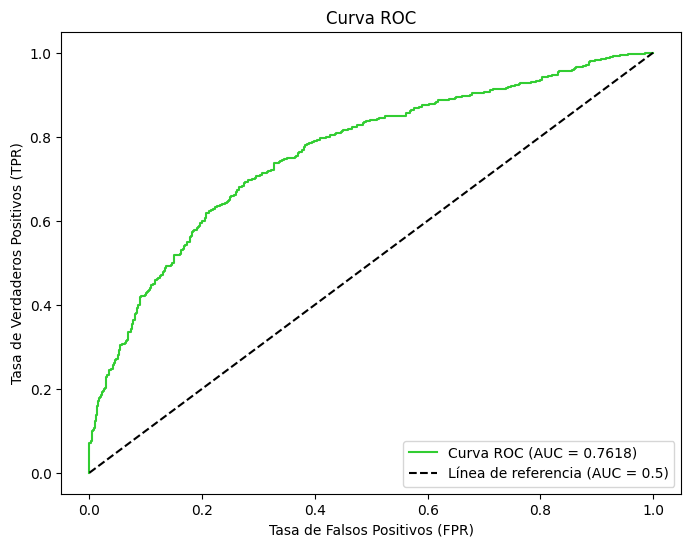

In [53]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_roc:.4f})', color='LimeGreen') #Curva ROC
plt.plot([0, 1], [0, 1], 'k--', label='Línea de referencia (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Se genera una version de la tabla con el nuevo AUC




In [54]:
#Se genera una version de la tabla con el nuevo AUC
clas_logit2 = (y_pred_proba >= optimal_threshold).astype(int)
pd.crosstab(y_test, clas_logit2,margins=True)

col_0,0,1,All
default,,,
0,695,250,945
1,125,267,392
All,820,517,1337


In [55]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       945
           1       0.52      0.68      0.59       392

    accuracy                           0.72      1337
   macro avg       0.68      0.71      0.69      1337
weighted avg       0.75      0.72      0.73      1337



Se puede observar una mejor precision y el recall para ambas clases (0 y 1)

#### **Score** (Modelo Logit)

In [56]:
def hist_fill_p(y_test,scaled_scores,bins=10):
    """
      Se grafican dos histogramas comparativos de 'scaled_scores,
      Separando los casos según el valor de y_test (0 = cumple, 1 = incumplen
    """
    fig, ax = plt.subplots(1,2,figsize=(10,6))
    bins = np.percentile(scaled_scores, np.arange(0, 100.1, 10))
    rangos = pd.cut(scaled_scores,bins=bins, duplicates='drop')
    df_hist = pd.DataFrame({'score':scaled_scores,'default':y_test,'rangos':rangos})

    row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
    df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
    df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').div(row_sums, axis=0).plot(kind='bar',stacked=True,ax=ax[1])

    # Gráfico de frecuencia absoluta (izquierda)
    ax[0].set_title('Frecuencia Absoluta')
    ax[0].set_xlabel('Rangos de Score')
    ax[0].set_ylabel('Cantidad')

    # Gráfico de frecuencia relativa (derecha)
    ax[1].set_title('Frecuencia Relativa')
    ax[1].set_xlabel('Rangos de Score')
    ax[1].set_ylabel('Proporcion')

    plt.tight_layout()
    plt.show()

In [57]:
# Asignar el puntaje (probabilidades predichas) a cada observación

data['score_logit'] = (1-reg_logit.predict_proba(x)[:, 1])*1000


<ipython-input-56-1c7802bfa412>:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-56-1c7802bfa412>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-56-1c7802bfa412>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index=

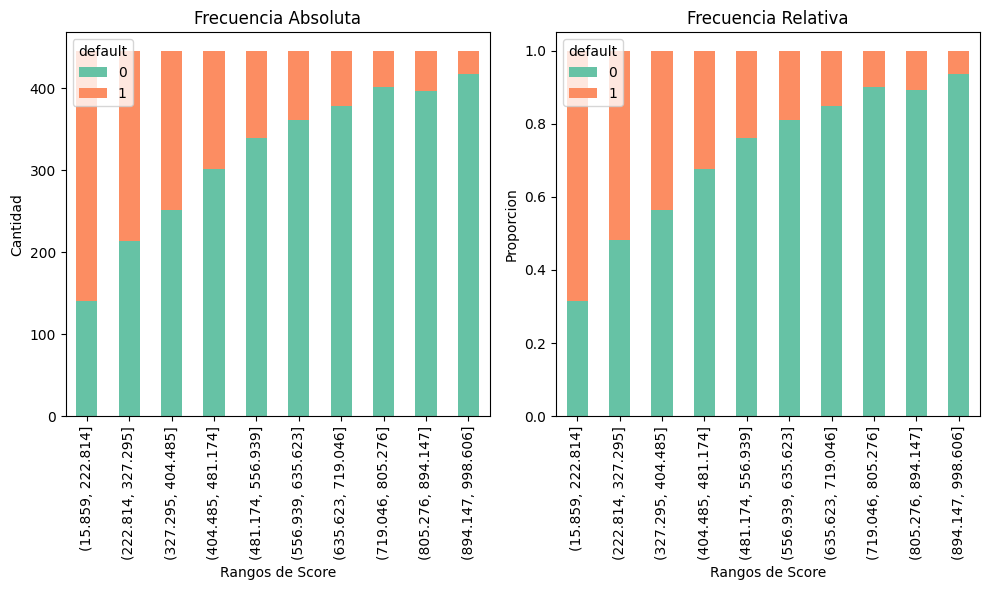

In [58]:
# Graficar el histograma de los puntajes para cada clase
hist_fill_p(data['default'],data['score_logit'])


Los valores de referencia absoluta y relativa permiten analizar cómo se distribuyen las observaciones de cada clase en los diferentes rangos de score.

Esto es útil para evaluar la capacidad del modelo para separar las clases y para identificar posibles problemas de calibración o desequilibrio de clases.


En la gráfica de referencia absoluta, se observa que en los rangos bajos de score (izquierda del gráfico), hay una mayor proporción de incumplimientos (clase1), mientras que en los rangos altos (derecha), predominan los cumplimientos (clase 0, en verde).

En el gráfico de Frecuencia Relativa, se representa la misma información pero en términos proporcionales en lugar de cantidad absoluta.
En los rangos de score más bajos, el porcentaje de incumplimiento es alto.
A medida que aumenta el score, la proporción de incumplimientos disminuye drásticamente, indicando que el modelo asigna scores más bajos a individuos con mayor riesgo de incumplimiento.

### **Modelo Arbol**

Ajustar modelo

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
reg_tree = DecisionTreeClassifier(max_depth=5)  # Configura el modelo con la data balanceada
reg_tree.fit(X_train_balanced, y_train_balanced)
reg_tree

DecisionTreeClassifier(max_depth=5)

### Prediccion inicial




In [61]:
clas_tree = reg_tree.predict(X_test)  # Predecir sobre el conjunto de prueba

In [62]:
pd.crosstab(y_test, clas_tree,margins=True)

col_0,0,1,All
default,,,
0,797,148,945
1,162,230,392
All,959,378,1337


In [63]:
print(classification_report(y_test, clas_tree))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       945
           1       0.61      0.59      0.60       392

    accuracy                           0.77      1337
   macro avg       0.72      0.72      0.72      1337
weighted avg       0.77      0.77      0.77      1337



Interpretación:

**Rendimiento para la Clase 0 (default = 0)**: Clientes buenos
El modelo tiene un buen rendimiento para la clase 0, con una precisión del 83% y un recall del 84%. Esto significa que el modelo es efectivo para identificar correctamente a los clientes que cumplen (default = 0).

Solo el 16% de los clientes que cumplen no son detectados (falsos negativos).

Esto indica que el modelo es efectivo para identificar correctamente a los clientes que cumplen (clase 0).

**Rendimiento para la Clase 1 (default = 1):** Clientes malos
El modelo tiene un rendimiento más bajo para la clase 1, con un recall moderado (0.59) y una precisión moderada (0.65).

Esto indica que el modelo tiene algunas dificultades para identificar correctamente a los clientes que incumplen (clase 1).

**Accuracy (Exactitud):**
El accuracy general del modelo es del 77%, lo que indica que clasifica correctamente la mayoría de las instancias.

Veamos el comportamiento de otras Metricas como lo es la **Curva ROC:**

#### Curva ROC

In [64]:
# Predicción de probabilidades
y_pred_proba = reg_tree.predict_proba(X_test)[:, 1]

In [65]:
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8103188100637081


In [66]:
#Determinar ek punto optimo de corte
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calcular el índice de Youden (J = TPR - FPR)
youden_j = tpr - fpr

# Encontrar el umbral óptimo (el que maximiza J)
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

# Mostrar el punto óptimo de corte
print(f"Punto óptimo de corte: {optimal_threshold:.4f}")

Punto óptimo de corte: 0.3875


**Observaciones:**

El modelo Tree con un AUC = 0.8103,  tiene una capacidad ligeramente mejor que el modelo Logit para distinguir entre las clases.

Punto óptimo de corte = 0.3875: El modelo es más propenso a clasificar instancias como clase 1 (incumplen), lo que puede aumentar el recall para la clase 1 pero reducir la precisión.

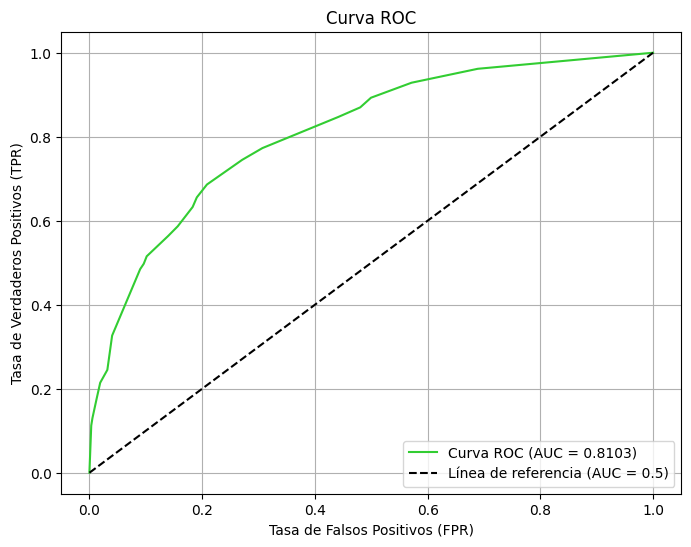

In [68]:
#Grafica de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_roc:.4f})', color='LimeGreen')  # Curva ROC
plt.plot([0, 1], [0, 1], 'k--', label='Línea de referencia (AUC = 0.5)')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')  # Leyenda en la esquina inferior derecha
plt.grid(True)
plt.show()

In [69]:
# Se genera una versión de la tabla con el nuevo umbral óptimo
clas_tree2 = (y_pred_proba >= optimal_threshold).astype(int)  # Aplicar el umbral óptimo

# Tabla de contingencia con las nuevas predicciones
pd.crosstab(y_test, clas_tree2, margins=True)



col_0,0,1,All
default,,,
0,748,197,945
1,123,269,392
All,871,466,1337


In [70]:
# Reporte de clasificación con las nuevas predicciones
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       945
           1       0.58      0.69      0.63       392

    accuracy                           0.76      1337
   macro avg       0.72      0.74      0.73      1337
weighted avg       0.78      0.76      0.77      1337



**Observaciones:** EL valor del accuracy disminuyó un poco de 0.77 a 0.76, pero mejoraron la precisión y el recall muestra valores balanceados para ambas clases.
En terminos generales, el modelo tiene un buen rendimiento para la clase 0, con alta precisión (0.86) y un recall aceptable (0.79).

El recall para la clase 1 es relativamente bueno (0.79), lo que indica que el modelo está detectando una buena proporción de instancias de la clase 1.

La precisión para la clase 1 no es tan baja (0.69), lo que significa que algunas instancias clasificadas como clase 1 son de la clase 0 (falsos positivos).

El F1-Score para la clase 1 mejoró (0.76), lo que sugiere que el modelo está mejorando en  equilibrar precisión y recall en esta clase.

#### **Score** (Modelo Tree)

In [71]:
# Asignar el puntaje (probabilidades predichas) a cada observación
data['score_tree'] = (1-reg_tree.predict_proba(x)[:, 1])*1000


<ipython-input-56-1c7802bfa412>:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-56-1c7802bfa412>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-56-1c7802bfa412>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index=

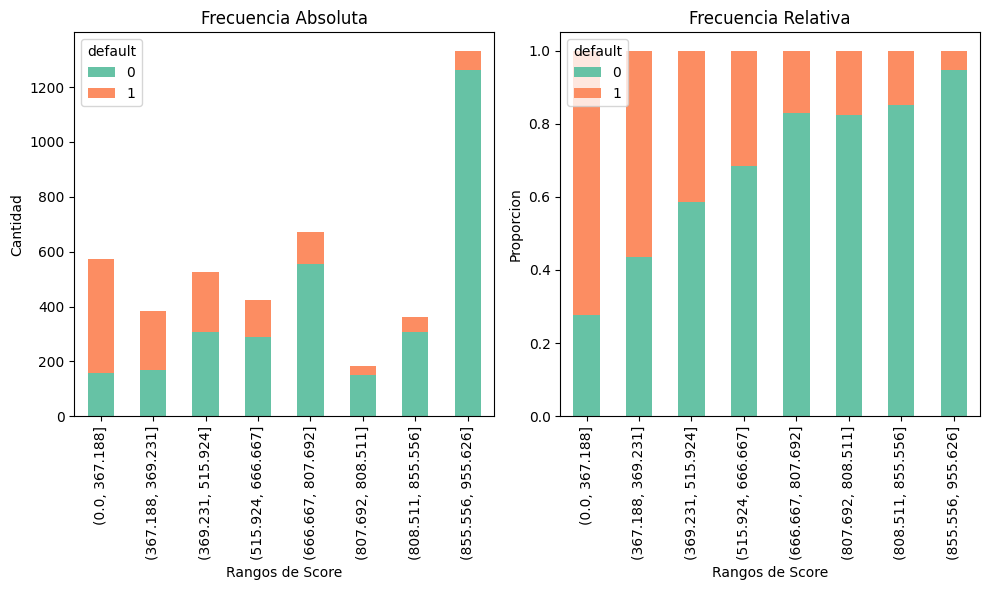

In [72]:

hist_fill_p(data['default'],data['score_tree'])


En la grafica de Frecuencia Absoluta se observa variabilidad en los diferentes rangos. Por ejemplo se tiene una gran concentración de datos en el rango más alto de score (855.55 - 955.63).
Y en los primeros rangos de score, hay una cantidad moderada de incumplimientos (color naranja).
A medida que el score aumenta, la cantidad de incumplimientos disminuye.


En la gráfica de Frecuencia Relativa, en los scores más bajos (0 - 367.18), la proporción de incumplimientos es muy alta.

En los scores más altos, la proporción de incumplimientos es mínima, indicando que el modelo clasifica correctamente a la mayoría de los cumplidores en los rangos altos.



###**Modelo Random Forest**

#### Ajustar modelo

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
reg_forest = RandomForestClassifier(max_depth=6, n_estimators=200)  # Configura el modelo
reg_forest.fit(X_train_balanced, y_train_balanced)

reg_forest

RandomForestClassifier(max_depth=6, n_estimators=200)

#### Prediccion inicial

In [75]:
clas_forest = reg_forest.predict(X_test)  # Predecir sobre el conjunto de prueba

In [95]:
pd.crosstab(y_test, clas_forest,margins=True)

col_0,0,1,All
default,,,
0,832,113,945
1,162,230,392
All,994,343,1337


Observaciones:

230 instancias de la clase 1 (default = 1) que el modelo clasificó correctamente como clase 1.

832 instancias de la clase 0 (default = 0) que el modelo clasificó correctamente como clase 0.

In [76]:
print(classification_report(y_test, clas_forest))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       945
           1       0.67      0.59      0.63       392

    accuracy                           0.80      1337
   macro avg       0.75      0.74      0.74      1337
weighted avg       0.79      0.80      0.79      1337



**Observaciones:**

Rendimiento para la Clase 0 (default = 0) => Clientes buenos
De todas las instancias clasificadas como clase 0, el 84% son correctas (Precisión  de 0.84)

El modelo identifica correctamente el 88% de todas las instancias reales de la clase 0 (Recall de 0.88)

F1-Score (0.86): Es un equilibrio entre precisión y recall, indicando un **buen rendimiento para la clase 0**.

Rendimiento para la Clase 1 (default = 1) => Clientes malos
De todas las instancias clasificadas como clase 1, el 67% son correctas (Precisión de 0.67)

El modelo identifica correctamente  el 59% de todas las instancias reales de la clase 1. (Recall  de 0.59)

F1-Score (0.63): Es un equilibrio entre precisión y recall, indicando un rendimiento aceptable para la clase 1.

Accuracy (Exactitud):
0.80: El modelo clasifica correctamente el 80% de todas las instancias en el conjunto de prueba. Este es un porcentaje mayor que los arrojados por los  modelos anteriores

El modelo tiene un buen rendimiento para la clase 0, pero necesita mejorar en la clasificación de la clase 1.


#### Curva ROC

In [77]:
# Predicción de probabilidades
y_pred_proba = reg_forest.predict_proba(X_test)[:, 1]


In [78]:
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8396015549076774


In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Calcular el índice de Youden (J = TPR - FPR)
youden_j = tpr - fpr

# Encontrar el umbral óptimo (el que maximiza J)
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

# Mostrar el punto óptimo de corte
print(f"Punto óptimo de corte: {optimal_threshold:.4f}")

Punto óptimo de corte: 0.4287


Observaciones:

Si recordamos el AUC-ROC es una métrica que mide la capacidad del modelo para distinguir entre las clases (0 y 1). Entonces, un valor de AUC-ROC cercano a 1 indica un modelo con alta capacidad de discriminación.

Para este modelo el valor de AUC-ROC = 0.8396 indica que el modelo tiene una buena capacidad para distinguir entre las clases.

Esto significa que, en promedio, el modelo puede clasificar correctamente las instancias en un 83.96% de los casos.

Un AUC-ROC de 0.8396 sugiere que el modelo es efectivo para separar las clases, lo cual es un resultado positivo, especialmente en un contexto de clases balanceadas.

--------------------------------------

Un umbral de 0.4287 es moderado, lo que sugiere que el modelo está equilibrando el recall y la precisión.

Este umbral puede ser útil para maximizar la capacidad del modelo para identificar correctamente ambas clases, especialmente en este contexto donde las clases están balanceadas.

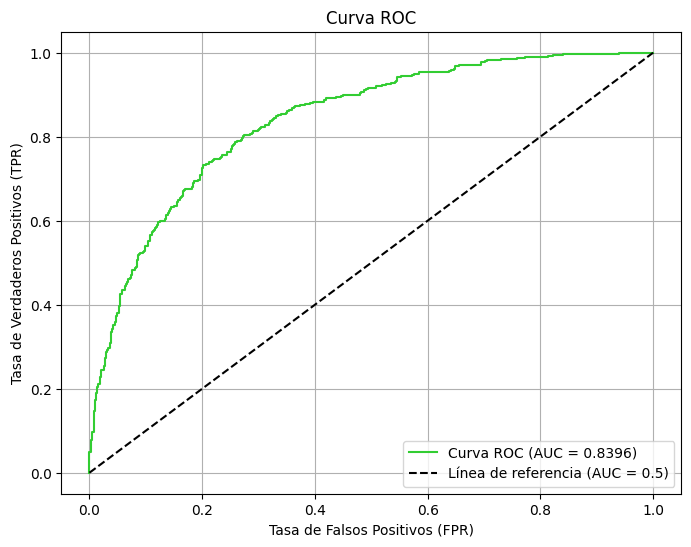

In [80]:
#Grafica de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_roc:.4f})', color='LimeGreen')  # Curva ROC
plt.plot([0, 1], [0, 1], 'k--', label='Línea de referencia (AUC = 0.5)')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')  # Etiqueta eje X
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')  # Etiqueta eje Y
plt.title('Curva ROC')  #
plt.legend(loc='lower right')  # Leyenda en la esquina inferior derecha
plt.grid(True)
plt.show()

In [81]:
#Se genera una version de la tabla con el nuevo AUC
#clas_forest2 = reg_forest.predict(X_test)  # Predecir sobre el conjunto de prueba

# Se genera una versión de la tabla con el nuevo umbral óptimo
clas_forest2 = (y_pred_proba >= optimal_threshold).astype(int)  # Aplicar el umbral óptimo

# Tabla de contingencia con las nuevas predicciones
pd.crosstab(y_test, clas_forest2, margins=True)

col_0,0,1,All
default,,,
0,755,190,945
1,105,287,392
All,860,477,1337


In [82]:

# Reporte de clasificación con las nuevas predicciones
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       945
           1       0.60      0.73      0.66       392

    accuracy                           0.78      1337
   macro avg       0.74      0.77      0.75      1337
weighted avg       0.80      0.78      0.78      1337



Se mejoró el recall,para la clase 1, lo cual puede ayudar a determinar a detectar la clase 1, esto es, los malos clientes.
sin embargo se disminuye un poco la precision para la clase 1.


## **Score**

In [83]:
data['score_forest'] = (1-reg_forest.predict_proba(x)[:, 1])*1000  # Probabilidades para la clase 1


<ipython-input-56-1c7802bfa412>:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)
<ipython-input-56-1c7802bfa412>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
<ipython-input-56-1c7802bfa412>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index=

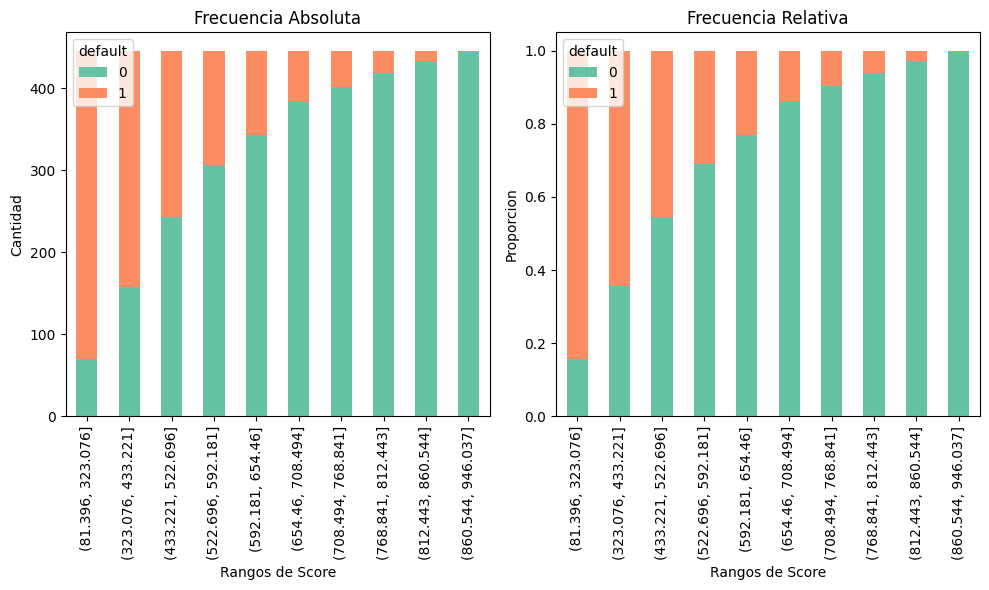

In [84]:
# Graficar el histograma de los puntajes para cada clase
hist_fill_p(data['default'],data['score_forest'])

Gráfica de Frecuencia Absoluta
En los scores más bajos (81.396 - 323.076), hay una mayor cantidad de incumplimientos (barras naranjas), indicando que el modelo los está asignando correctamente en estos rangos.
A medida que el score aumenta, la cantidad de incumplimientos disminuye progresivamente.
En los rangos más altos (860.544 - 946.037), casi el 100% de los casos corresponden a cumplimientos (barras verdes), lo que sugiere que el modelo predice con mayor confianza los buenos pagadores en estos rangos.
En la gráfica de Frecuencia Relativa (Derecha) se tiene que en los primeros rangos (81.396 - 323.076) , más del 50% de los casos corresponden a incumplimientos.
En la zona intermedia (592.181 - 654.46), la proporción de incumplimientos comienza a disminuir considerablemente.
En los scores más altos, la proporción de incumplimientos es casi nula, indicando que el modelo asigna con alta seguridad los cumplimientos a estos rangos.




Comparado con el modelo logit, el modelo Random Forest logra una separación más clara de los incumplidores en los primeros rangos y de los cumplidores en los rangos más altos.
En comparación con el modelo de árboles de decisión, **Random Forest** muestra una mayor estabilidad en la distribución de scores, evitando una concentración extrema de datos en ciertos rangos.

A diferencia del modelo de árboles de decisión, que tenía una distribución más discreta, Random Forest ofrece una mejor gradación en los scores, lo que sugiere que proporciona una mejor diferenciación entre perfiles de riesgo.
Mejor capacidad de generalización

Conclusiones
Random Forest parece ofrecer la mejor separación de incumplimientos y cumplimientos, con una distribución de scores más estable y granular.
Es menos propenso a sobreajuste que el modelo de árboles de decisión, lo que lo hace más robusto.

#**4. Evaluación y Selección del Modelo**


---

In [85]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       945
           1       0.52      0.68      0.59       392

    accuracy                           0.72      1337
   macro avg       0.68      0.71      0.69      1337
weighted avg       0.75      0.72      0.73      1337



In [86]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       945
           1       0.58      0.69      0.63       392

    accuracy                           0.76      1337
   macro avg       0.72      0.74      0.73      1337
weighted avg       0.78      0.76      0.77      1337



In [87]:
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       945
           1       0.60      0.73      0.66       392

    accuracy                           0.78      1337
   macro avg       0.74      0.77      0.75      1337
weighted avg       0.80      0.78      0.78      1337



El modelo **Random Forest** es el mejor entre los tres, ya que tiene:

La mayor precisión, recall y F1-Score para ambas clases.

La mayor exactitud (accuracy).

Además, el Random Forest tiene un mejor equilibrio entre precisión y recall, especialmente para la clase 1 (incumplimiento), lo cual es importante en problemas de clasificación con clases desbalanceadas.



El modelo **Random Forest** es el mejor **en términos de AUC-ROC**, con un valor de 0.8396, lo que indica una buena capacidad para distinguir entre las clases.

El modelo Tree tiene un AUC-ROC ligeramente superior al modelo Logit, pero ambos están en el rango de moderadamente bueno.

Si el objetivo es maximizar la capacidad de discriminación del modelo, el Random Forest es la mejor opción.

Luego de esta comparación de los resultados, **se usará  el modelo Random Forest** para la implementación final, ya que tiene el mayor AUC-ROC y, por lo tanto, la mejor capacidad para distinguir entre las clases.

In [88]:
perfil = x.iloc[0:1]
perfil

,seniority,time,age,expenses,income,assets,debt,amount,price,home_other,...,marital_married,marital_other,marital_single,records_no,records_yes,job_fixed,job_freelance,job_others,job_partime,job_unk
0,9,60,30,73.0,129.0,0.0,0.0,800.0,846.0,0,...,1,0,0,1,0,0,1,0,0,0


# 5. Implementación del modelo

## Crear el perfil de prueba

In [89]:
## Crear el perfil de prueba

def crear_fila_dataframe():
    # Diccionario base con todos los campos inicializados a cero
    datos = {
        'seniority': 0.0, 'time': 0.0, 'age': 0.0, 'expenses': 0.0,
        'income': 0.0, 'assets': 0.0, 'debt': 0.0, 'amount': 0.0,
        'price': 0.0, 'home_other': 0.0, 'home_owner': 0.0,
        'home_parents': 0.0, 'home_private': 0.0, 'home_rent': 0.0,
        'marital_married': 0.0, 'marital_other': 0.0, 'marital_single': 0.0,
        'records_no': 0.0, 'records_yes': 0.0, 'job_fixed': 0.0,
        'job_freelance': 0.0, 'job_others': 0.0, 'job_partime': 0.0,
        'job_unk': 0.0}
          # Rellenar los datos mediante input del usuario
    for campo in datos:
        valor = input(f"{campo} (actual: {datos[campo]}): ")
        if valor.strip():  # Si no está vacío, actualizar el valor
            datos[campo] = float(valor)

    # Crear DataFrame con una única fila
    df = pd.DataFrame([datos])
    return df


In [90]:
# Uso de la función
df_usuario = crear_fila_dataframe()

seniority (actual: 0.0): 9
time (actual: 0.0): 60
age (actual: 0.0): 30
expenses (actual: 0.0): 73.0
income (actual: 0.0): 129.0
assets (actual: 0.0): 0.0
debt (actual: 0.0): 0.0
amount (actual: 0.0): 800.0
price (actual: 0.0): 846.0
home_other (actual: 0.0): 0
home_owner (actual: 0.0): 1
home_parents (actual: 0.0): 0
home_private (actual: 0.0): 0
home_rent (actual: 0.0): 0
marital_married (actual: 0.0): 1
marital_other (actual: 0.0): 0
marital_single (actual: 0.0): 0
records_no (actual: 0.0): 1
records_yes (actual: 0.0): 0
job_fixed (actual: 0.0): 0
job_freelance (actual: 0.0): 1
job_others (actual: 0.0): 0
job_partime (actual: 0.0): 0
job_unk (actual: 0.0): 0


### Generamos una prediccion

In [91]:
risk = reg_forest.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1-risk)*1000:.0f}")

Score del cliente 641


Se disminuyó el Score del Cliente , pero con la clase balanceada se asegura una mayor precisión en detectar los clientes con mayor riesgo de fallo crediticio